## Métodos Numéricos II: Examen Práctica 1

#### Autor: Juan Manuel Rodríguez Gómez

In [23]:
import numpy as np
import sympy as sp

In [24]:
dni = [4,9,5,5,9,4,9,4]
S = sum(dni)
M = S / 8

S, M

(49, 6.125)

In [25]:
def f(x):
    ''' función x**3+49*x+6.125'''
    return x**3+49*x+6.125

In [26]:
x = sp.Symbol("x") # Variable simbólica x

#### Apartado a)

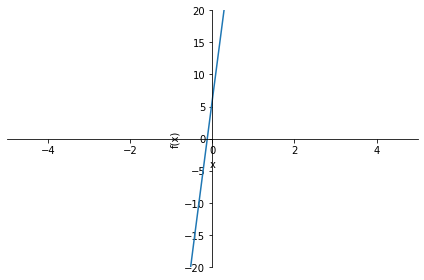

In [27]:
sp.plot(f(x),xlim=(-5.,5.),ylim=(-20.,20.))

#### Apartado b)

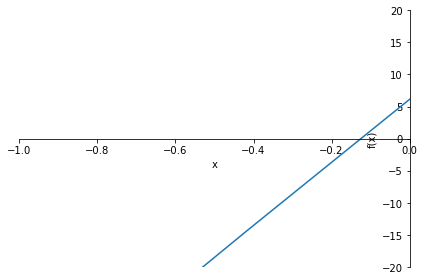

In [28]:
sp.plot(f(x),xlim=(-1.,0.),ylim=(-20.,20.))

Vemos que la única raíz real de $f(x)$ está entre -0.2 y 0.

#### Apartado c)

In [29]:
def IteracionesNecesarias(a,b,tolerancia):
    return np.ceil( np.log( (b-a)/tolerancia )/np.log(2)-1)

In [30]:
a = -1
b = 0
tol = 10**(-1)

In [31]:
IteracionesNecesarias(a,b,tol)

3.0

Por tanto, aplicando el método de bisección, vemos que harían falta 3 iteraciones.

Comprobémoslo, definiendo dicho método y aplicándoselo a la función.

In [32]:
def biseccion(a,b,tol,prec,nmax):
    niter = 0; sale = ''
    for k in range(nmax):
        c = a + (b-a)/2 # equivalente a c = (a+b)/2
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if sign(f(a)) != sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break
        niter = niter + 1;


    if sale == 'precision':
        print('Posiblemente solución exacta: ',c)
    elif niter < nmax:
        print('Aproximación solicitada: ',c)
    else:
        print('Se llegó al número máximo de iteraciones')
    print('Número total de iteraciones ', niter)

In [33]:
nmax = 100       # Número máximo de iteraciones
prec = 10**(-16) # Precisión
tol = 10**(-1)   # Tolerancia

In [34]:
biseccion(a,b,tol,prec,nmax)

Aproximación solicitada:  -0.0625
Número total de iteraciones  3


Vemos que hemos obtenido la aproximación de la raíz real de $f(x)$ con la tolerancia pedida en el número de iteraciones que calculamos previamente.

#### Apartado d)

In [35]:
def df(x):
    ''' función 3*x**2+49'''
    return 3*x**2+49

In [36]:
def NewtonRaphson(a,niter):
    x0 = a; 
    listaNR = [x0];
    for k in range(niter):
        x1 = x0 - f(x0)/df(x0); 
        x0 = x1;
        listaNR.append(x1)
        
    return listaNR;

In [37]:
a = -0.0625; # Usamos como semilla la solución aproximada dada por el método de bisección
niter = 10;

listaNR = NewtonRaphson(a,niter)

In [38]:
print(listaNR)

[-0.0625, -0.12498007491830716, -0.12496017839166763, -0.12496017838864153, -0.12496017838864154, -0.12496017838864154, -0.12496017838864154, -0.12496017838864154, -0.12496017838864154, -0.12496017838864154, -0.12496017838864154]


#### Apartado e)

In [39]:
solucion_biseccion = -0.0625
solucion_NR = listaNR[-1]

coefs = [1,0,49,6.125]
solucion_exacta = np.roots(coefs)

In [40]:
solucion_biseccion

-0.0625

In [41]:
solucion_NR

-0.12496017838864154

In [42]:
solucion_exacta

array([ 0.06248009+7.00083647j,  0.06248009-7.00083647j,
       -0.12496018+0.j        ])

Vemos que realmente esta ecuación tiene 3 soluciones, dos complejas y una real. Como hemos calculado la solución real aproximada con bisección y Newton-Raphson, consideramos solo la solución exacta real, es decir, -0.12496018.

In [43]:
solucion_exacta_real = -0.12496018

In [44]:
print('Error cometido en bisección: ', abs(solucion_exacta_real - solucion_biseccion))
print('Error cometido en Newton-Raphson: ', abs(solucion_exacta_real - solucion_NR))

Error cometido en bisección:  0.062460180000000004
Error cometido en Newton-Raphson:  1.6113584633270506e-09


Observamos que el error cometido con Newton-Raphson con respecto a la solución real exacta, es mucho menor en comparación con el error cometido con el método de bisección